### K-MEANS кластеризация

Алгоритм очень простой

* задаем k - на сколько кластеров хотим разбить данные
* R - это расстояние между точками в пространсве n признаков, которыми обладают данные
* Выбираем k случайных объектов в данных (записей) - первые элементы новых кластеров
* Для каждой записи считаем R до каждого кластера. Расстояние считается до центроида кластера, а центроид определяться может по-разному:
    * как среднее значение в кластере (покоординатно просто) 
    * как медианное значение в кластере
* Присваем записи кластер до которого расстояние минимально
* Повторяем алгоритм пока результат по всем записям не повториться (никакой объект не изменит кластер)
* делаем еще сколько-то итераций алгоритма, чтобы первые выбранные k элементов попались другие
* Выбираем вариант где сумма по всем кластерам расстояний внутри класетров до своих центроидов минимальна

In [126]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

# загружаем данные
df = pd.read_csv('pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


<AxesSubplot: xlabel='Attack', ylabel='Defense'>

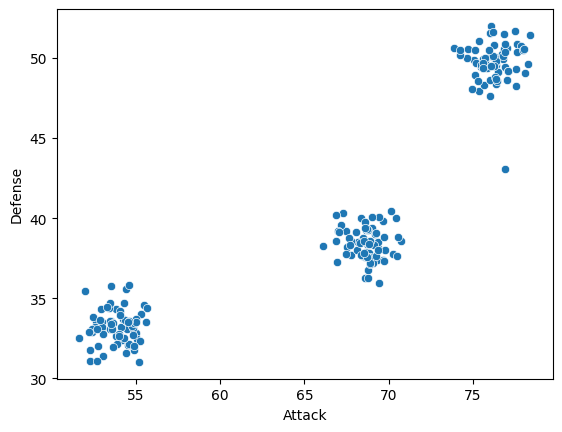

In [127]:
# попробуем кластеризовать покемонов по их силе атаки и уровню защиты
# для этого сохраним в матрицу X два интересующих нас признака: атаку и защиту
X = df[['Attack', 'Defense']]

#визуализируем
sns.scatterplot(x=X['Attack'],y=X['Defense'])

Из получившегося графика непонятно, сколько кластеров должно быть и как их выбрать. Попробуем разделить данные на три кластера.

Инициализируем алгоритм k-means. При инициализации зададим параметры моделирования:

* n_clusters — количество кластеров;
* init — стратегия кластеризации;
* n_init — количество запусков алгоритма k-means;
* random_state — чтобы результаты воспроизводились от запуска к запуску.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

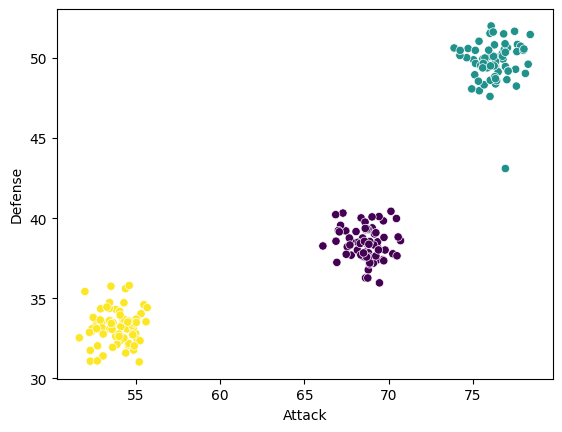

In [128]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Попробуем увеличить количество кластеров до четырёх, чтобы вынести выброс в отдельный кластер:

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

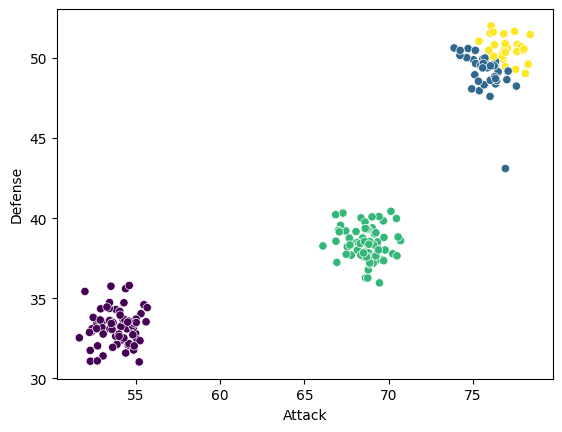

In [129]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты. Параметр c принимает вектор с номерами классов для группировки объектов по цветам 
sns.scatterplot(x=df.Attack, y=df.Defense, c=predictions)

Как видим, «отделить» выброс от других данных не получается: k-means не умеет обрабатывать выбросы.

In [130]:
# добавляем третий признак — скорость покемона, алгоритм такой же
#X = df[['Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
#kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
#kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
#predictions = kmeans.predict(X)
#predictions = kmeans.labels_

#X['class'] = predictions 

In [131]:
#import plotly.express as px

#fig = px.scatter(X, x='Speed', y='Defense',
#              color='class')
#fig.show()

**НЕДОСТАТКИ АЛГОРИТМА K-MEANS**

* Необходимо заранее знать, на сколько кластеров мы хотим разделить данные. В учебных примерах известно, каким должно быть k, и определить это значение довольно легко. В реальности данные сложнее и трудно заранее предугадать, сколько кластеров мы хотим получить.

* Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо.

* Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера.

* Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы. (как с Примером Speed/Defense)

* Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров.

**ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО K ДЛЯ АЛГОРИТМА K-MEANS**

Для этого можно использовать несколько способов: метод локтя (elbow plot), статистику разрыва (Gap Statistic Method), коэффициент силуэта (Average Silhouette Method). Мы рассмотрим **метод локтя** и **коэффициент силуэта.**

***Метод локтя***

Данный метод позволяет найти такое оптимальное число кластеров, чтобы добавление ещё одного кластера не приводило к лучшему моделированию данных.

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

Чтобы определить оптимальное количество кластеров, используя метод локтя, необходимо нарисовать график, на котором по оси x будет отложено количество кластеров, а по оси y — инерция.

Инерция — это сумма квадратов расстояний объектов датасета до центра масс ближайшего к ним кластера.

Когда инерция быстро снижается, область считается недообученной, а далее, после «перегиба», идёт очень медленное снижение инерции, и область считается переобученной.

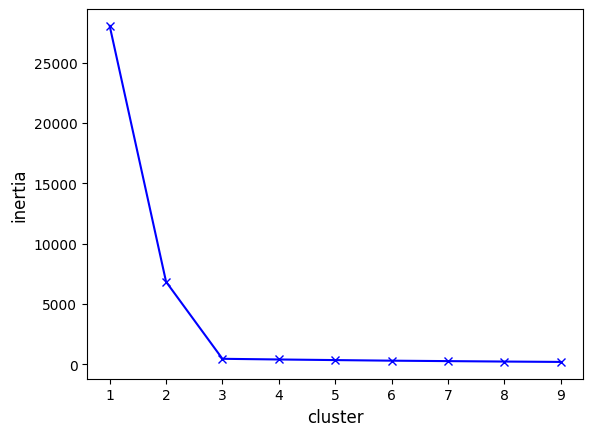

In [132]:
X = df[['Defense', 'Attack']]

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Как можно заметить из графика, на сгибе k=3. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения k от 1 до 2 — недообученная область, а после значения 3 идёт переобучение.

***Коэфицент силуэта***

Некорректное описание было, но примерно это следующее. Среднее значение по всем точкам  (среднего расстояния до элементов своего кластера минус среднее расстояние до объектов другого ближайшего кластера) разделить на максимум этих расстояний (для нормализации)

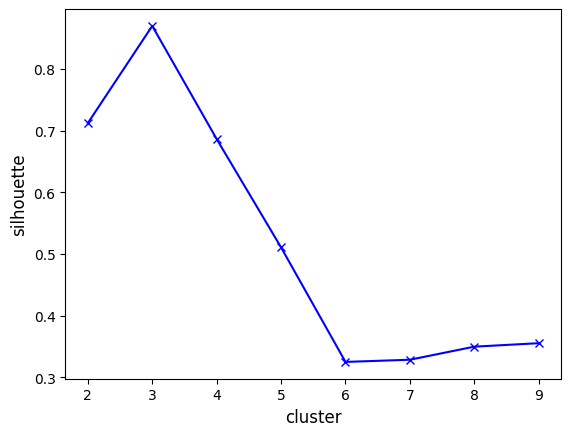

In [133]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

Получается что лучший результат там где кластеры макстмально сгруппированы (грубо)

In [134]:
#Задание 2.7
#Вам как специалисту по анализу данных поступили показания с прибора, измеряющего количество нитратов и пестицидов в разных фруктах и овощах.

#Значения количества пестицидов и нитратов записаны в столбцы с названиями x1 и x2.

#Основываясь на этих двух свойствах, кластеризуйте данные и, используя коэффициент силуэта, найдите оптимальное количество кластеров.

In [135]:
task_df = pd.read_csv('values_from_the_instrument.csv')
task_df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


<AxesSubplot: xlabel='x1', ylabel='x2'>

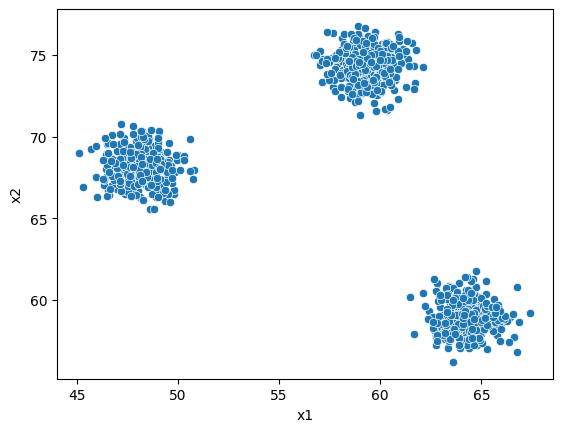

In [136]:
sns.scatterplot(x=task_df['x1'],y=task_df['x2'])

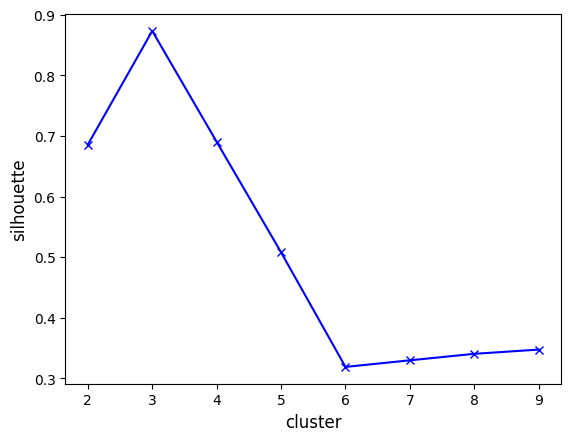

In [137]:
silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, task_df))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

### Метрики кластеризации

Допустим, мы разделили кошек и собак на два кластера: в каждом из кластеров находятся либо только кошки, либо только собаки. Но может получиться так, что в ходе кластеризации мы разделим одинаковых собак по разным кластерам или кошки с собаками перемешаются

Поэтому было бы хорошо как-то оценивать, не создали ли мы лишние кластеры или одинаковые ли объекты в нашем кластере. В этом нам помогут метрики, которые мы рассмотрим далее.

Чтобы понять, правильно ли объекты распределились по кластерам, необходимо знать, в каких кластерах должны быть объекты.

Ранее мы говорили, что кластеризация относится к методу машинного обучения без учителя и применяется, когда нет размеченных данных, а значит мы не знаем правильных ответов. Однако иногда размеченные данные всё же есть. В таком случае мы можем провести дополнительный анализ получившихся кластеров.

Существует ряд метрик, которые можно подсчитать, **если данные размечены**. Мы рассмотрим четыре метрики, которые больше всего помогут нам при анализе результатов кластеризации:

**ОДНОРОДНОСТЬ КЛАСТЕРОВ (HOMOGENEITY SCORE)**

Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.
Метрика меняется от 0 (перемешано все) до 1 (полностью однородно - в каждогм кластере только свои объекты)

In [138]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


In [139]:
print(homogeneity_score(labels_true=[1, 1, 0, 0], labels_pred=[0, 0, 1, 1]))

1.0


In [140]:
print(homogeneity_score(labels_true=[0, 1, 1, 0], labels_pred=[0, 0, 1, 1]))

0.0


Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

In [141]:
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
1.0


Вы можете удивиться, что во втором случае метрика равна 1, но это нормально: хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными. Т.е. в кластер 3 правильный попали только элементы кластер 3 и 4 расчетных

**ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)**

Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше

При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.

In [142]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

In [143]:
completeness_score(labels_true=[1, 1, 1, 1], labels_pred=[0, 0, 1, 1])

0.0

Рассмотрим метрику полноты на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

In [144]:
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.829867483307009


Так получилось потому что кластер 3 эталонный не полон

**V-МЕРА (V-MEASURE)**

Эта метрика — комбинация метрик полноты и однородности.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

$v = \frac{(1 + \beta) \times homogeneity \times completeness}{(\beta \times homogeneity + completeness)}$

По умолчанию $\beta$ = 1, но это значение можно варьировать, если хочется дать разный вес разным свойствам.

Если однородность кластеров важнее, чем их полнота, следует указать значение < 1

Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов тогда >1

Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

In [145]:
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))

1.0
0.9070246789753754


**ИНДЕКС РЭНДА**

Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

$Rand \ Index = \frac{number \ of \ agreeing \ pairs}{number \ of \ pairs}$

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

In [146]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [147]:
rand_score([1, 1, 0, 0], [0, 0, 1, 1])

1.0

In [148]:
rand_score([0, 1, 1, 1], [0, 1, 1, 0])

0.5

In [149]:
#Задание 3.3
#Для пяти объектов вы провели кластеризацию k-means. 
# Известно, что объекты должны относиться к следующим кластерам: 1, 2, 2, 1, 0. 
# В ходе работы алгоритма вы получили следующие предсказания для каждого элемента: 1, 0, 2, 1, 2.

#Рассчитайте метрику однородности полученных кластеров. Введите полученное значение, округлив его до второго знака после точки-разделителя.

print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


### ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

In [150]:
from sklearn.cluster import AgglomerativeClustering
a_c = AgglomerativeClustering(n_clusters=2)
a_c.fit(X)
a_c.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Базовые параметры, которые необходимо передать в AgglomerativeClustering:

* n_clusters — количество кластеров; по умолчанию — 2.
* linkage — метод определения расстояния между кластерами, которое мы рассматривали выше. Можно выбрать single, ward, average, complete; по умолчанию используется ward.
    * single - расстояние между кластерами считаем, как минимум расстояний между их элементами
    * complete - расстояние между кластерами считаем, как макстмум расстояний между их элементами
    * ward - минимизируем разброс внустри кластеров
    * average - расстояние между кластерами как среднее расстоняие между кластерами 

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ ИЕРАРХИЧЕСКОЙ КЛАСТЕРИЗАЦИИ**

***Плюсы***

* Можно построить дендрограмму и понять, как устроены данные.
* Работает на небольшом датасете.

***Минусы***

* Необходимость выбора оптимального количества кластеров.
* Если данных много, дендрограмма становится большой и сложной для понимания.
* Может неравномерно разделять данные на кластеры.

### EM-алгоритмы кластеризации

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

на шаге E мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
на шаге M мы пересчитываем центроиды кластеров.
Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — модель гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).



На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.

### модель гауссовой смеси (Gaussian Mixture Model, GMM)

In [151]:
from sklearn.mixture import GaussianMixture

In [152]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

* n_components — количество кластеров.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

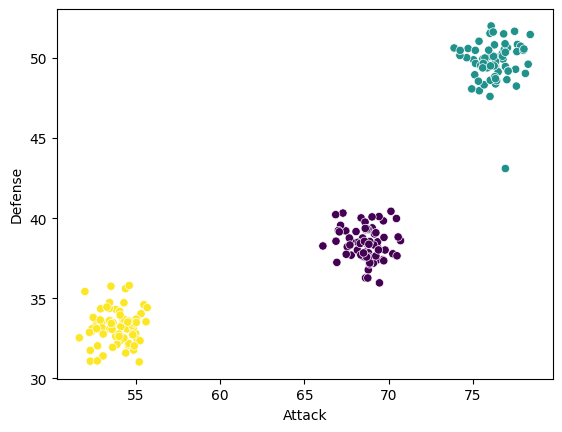

In [153]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

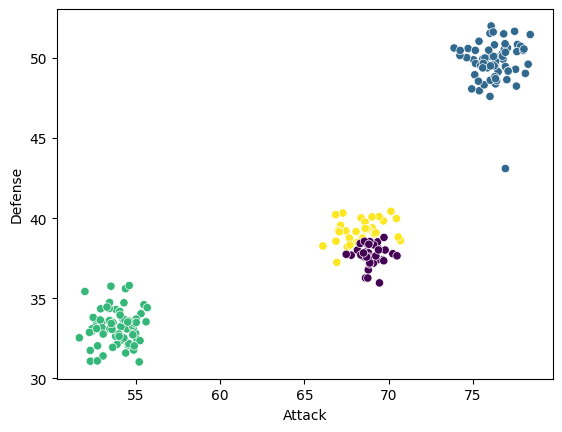

In [154]:
gm_clustering = GaussianMixture(n_components=4, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
sns.scatterplot(x=df.Attack, y=df.Defense, c=gm_prediction)

<AxesSubplot: xlabel='Speed', ylabel='Defense'>

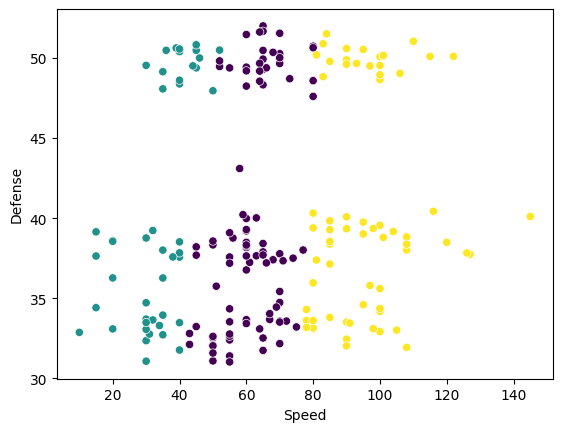

In [155]:
X = df[['Defense', 'Speed']]



gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
sns.scatterplot(x=df.Speed, y=df.Defense, c=gm_prediction)


In [156]:
#Задание 5.4
#Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. 
#Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [157]:
task_df = pd.read_csv('housing.csv')
task_df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='price', ylabel='year'>

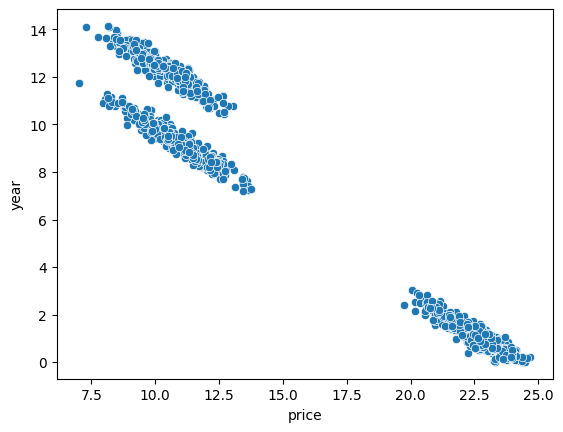

In [158]:
sns.scatterplot(x=task_df.price, y=task_df.year)

<AxesSubplot: xlabel='price', ylabel='year'>

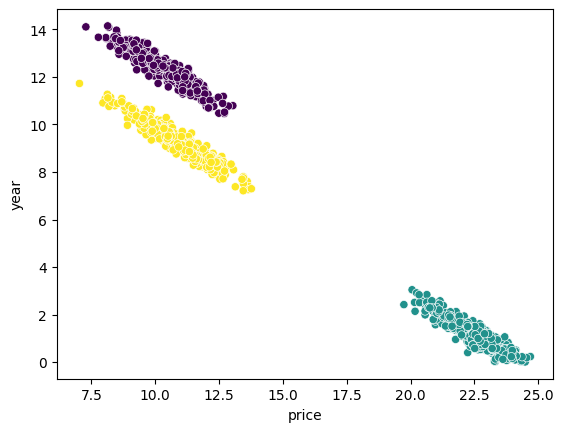

In [159]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(task_df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(task_df)
sns.scatterplot(x=task_df.price, y=task_df.year, c=gm_prediction)


<AxesSubplot: xlabel='price', ylabel='year'>

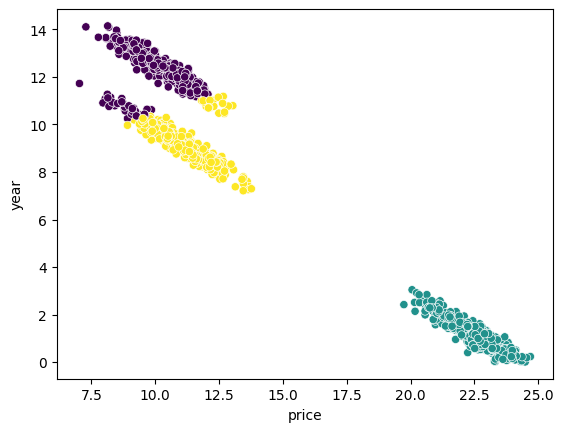

In [160]:
k_mean_clustering = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# обучаем модель 
k_mean_clustering.fit(task_df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
k_mean_prediction = k_mean_clustering.predict(task_df)
sns.scatterplot(x=task_df.price, y=task_df.year, c=k_mean_prediction)

### Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Алгоритм спектральной кластеризации состоит из четырёх шагов:

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете. Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине. Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин

2. После этого проводим некоторые математические преобразования этой матрицы. (Это как-то связано как раз со спектром и вероятно сингулярными числами)

3. Далее уменьшаем размерность данных. Сейчас одна вершина описывается шестью признаками, а значит, если проводить кластеризацию этих данных, кластеризация будет в шестимерном пространстве. С помощью подходов понижения размерности мы можем уменьшить количество признаков, описывающих вершину. На данный момент вникать в суть преобразований нам не нужно (в одном из следующих юнитов этого модуля мы разберём эту задачу более подробно) — сейчас важно понять саму идею преобразования, а также то, что до понижения размерности мы описывали одну вершину графа шестью признаками, а после преобразования стали описывать её одним признаком

4. Далее проводим кластеризацию матрицы с уменьшенной размерностью.


In [161]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

Основные параметры SpectralClustering:

n_clusters — количество кластеров; по умолчанию — 8.
random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

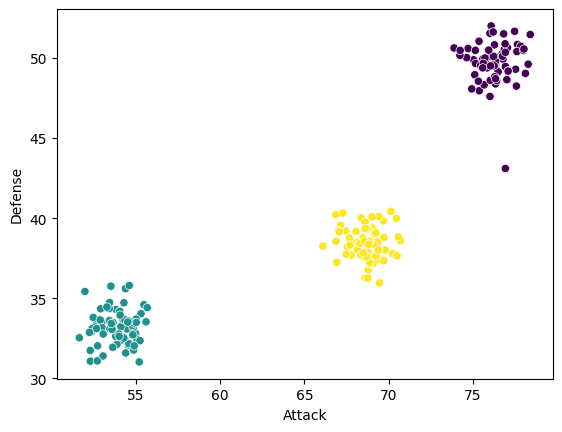

In [162]:
sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

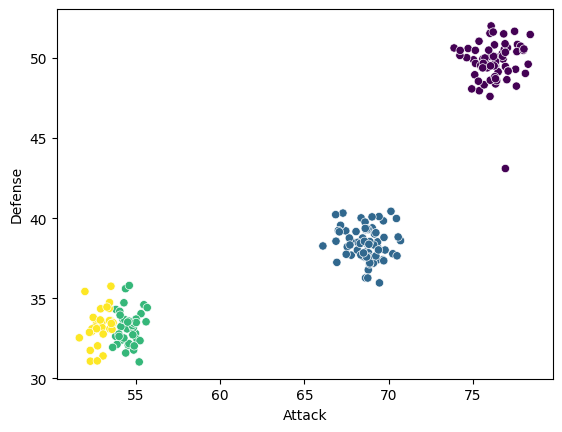

In [163]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42)

spectral_clustering.fit(df[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

sns.scatterplot(x=df.Attack, y=df.Defense, c=spectral_predictions)

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ**

***Плюсы***

* Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.
* Эффективна для кластеризации разрежённых данных.
* Хорошо работает на практически любых распределениях данных. КРоме вытянутых эллипсов

***Минусы***

* Нужно заранее задавать количество кластеров.
* Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

### Кластеризация на основе плотности

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам не нужно задавать количество кластеров — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы.

**DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)**

Данный алгоритм применим, если:

* перед вами стоит задача с данными сложной формы, например выделение районов на карте
* в данных большое количество выбросов, например данные медицинских анализов пациентов.

Алгоритм работы:

1. Сначала необходимо выбрать случайный объект в данных (на рисунке выбранная точка выделена красным) и в некотором радиусе  от этой точки найти всех соседей. Радиус данной окружности задаётся и может регулироваться пользователем. Далее подсчитаем, сколько точек перекрывает окружность. Далее будем выбирать точки в данных и таким же образом находить соседей этих точек.
2. Выделим центральные точки (core points). Центральными будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем. Находим центральные точки во всём датасете. Это будет выглядеть так
3. Среди центральных точек выберем случайным образом одну и примем, что эта точка относится к первому кластеру. Далее найдём все центральные точки, находящиеся в заданном радиусе от этой точки. Если же в заданном радиусе окажутся не только центральная, но и нецентральная точки, то на данном этапе такая точка не будет добавлена в кластер
4. После того как центральные точки в первом кластере заканчиваются, мы начинаем находить нецентральные точки, которые располагаются в радиусе  от объектов
5. Далее переходим к неразмеченной области в данных Заново повторяем алгоритм, начиная с пункта 3, и в итоге получаем второй кластер и т.д. пока все центарльные точки не получат кластер
6. Точки, которые не имеют соседей в заданном радиусе, считаются выбросами и не принадлежат ни к одному кластеру.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

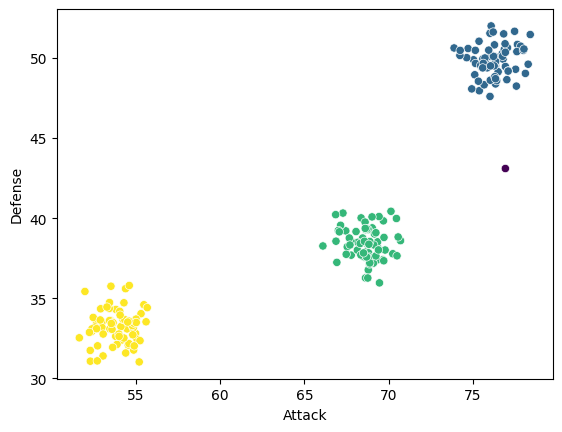

In [165]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

Основные параметры для запуска DBSCAN:

* eps — это радиус, про который мы говорили выше, когда рассматривали алгоритм. Это один из важнейших параметров в алгоритме DBSCAN. Попробуйте изменять его и посмотрите, как будут меняться кластеры в зависимости от значения параметра. Если данные разрежённые, значение радиуса должно быть больше. Если же данные расположены довольно близко друг к другу, значение радиуса можно уменьшить.
* min_samples — задаёт необходимое количество точек, которое должно быть в заданном радиусе от точки, чтобы она считалась центральной.

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

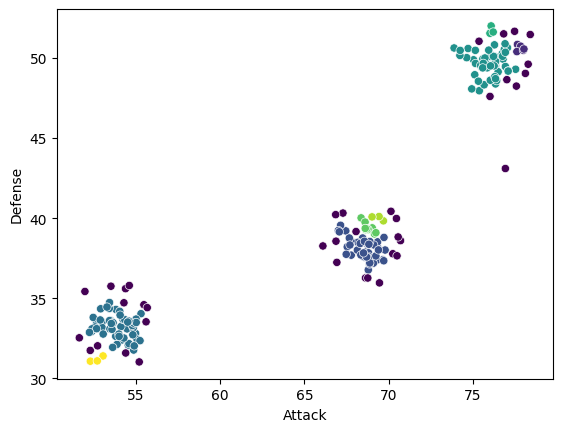

In [168]:
# импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.5, min_samples=3).fit(df[['Attack', 'Defense']])

# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df.Attack, y=df.Defense, c=clustering.labels_)

**ПРЕИМУЩЕСТВА И НЕДОСТАТКИ DBSCAN**

***Плюсы***
* Не нужно задавать количество кластеров.
* Устойчив к шуму и выбросам, может находить выбросы в данных.
* Способен найти кластеры любой геометрической формы.

***Минусы***
* Не может качественно кластеризовать наборы данных с большой разницей в плотности.
* Равноудалённые от двух кластеров объекты могут быть отнесены к тому кластеру, с которого алгоритм начал работать, что не всегда оказывается верным.
* Бывает сложно подобрать eps.

In [ ]:
#Задание 7.5
#Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. 
# Визуализируйте результаты. Сколько точек было размечено как выбросы?

In [169]:
task_df = pd.read_csv('housing.csv')

task_df.head(2)

,year,price
0,0.081091,23.790515
1,9.483270,10.784598


<AxesSubplot: xlabel='year', ylabel='price'>

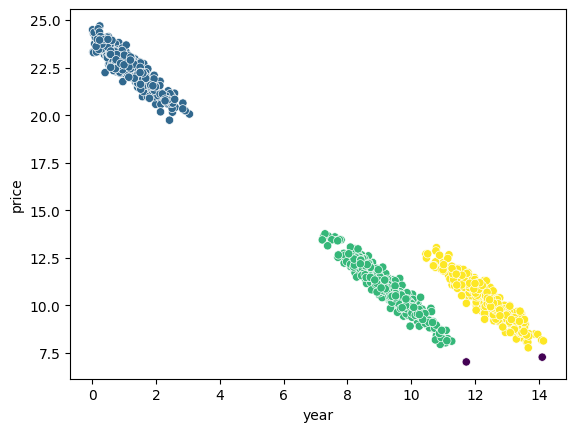

In [170]:
clustering = DBSCAN().fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

<AxesSubplot: xlabel='year', ylabel='price'>

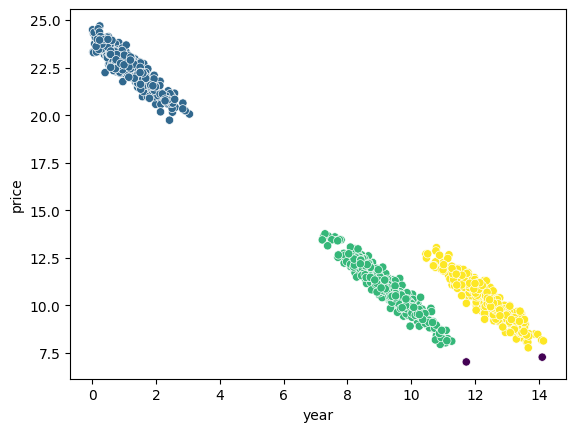

In [173]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)


<AxesSubplot: xlabel='year', ylabel='price'>

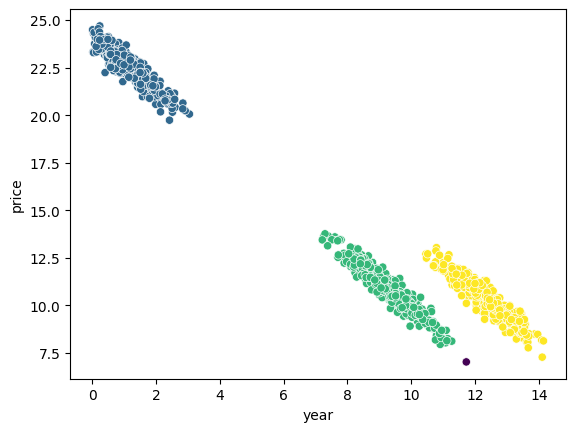

In [174]:
clustering = DBSCAN(eps=0.7, min_samples=6).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

<AxesSubplot: xlabel='year', ylabel='price'>

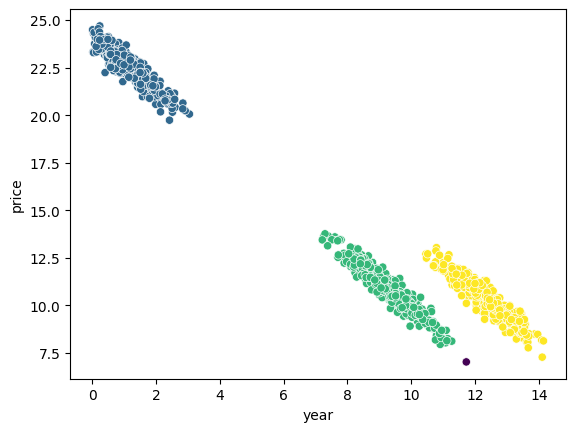

In [175]:
clustering = DBSCAN(eps=0.7, min_samples=5).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)

<AxesSubplot: xlabel='year', ylabel='price'>

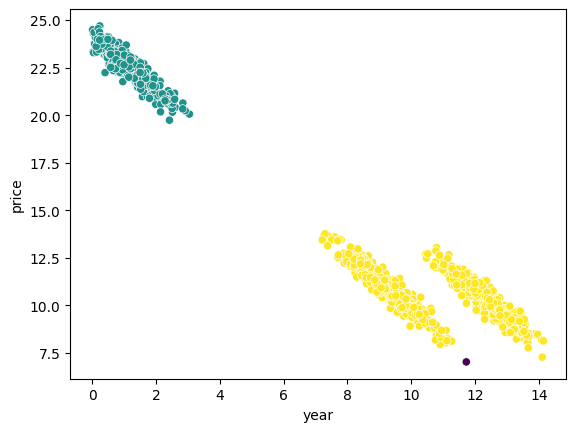

In [176]:
clustering = DBSCAN(eps=1.15, min_samples=2).fit(task_df)
sns.scatterplot(x=task_df['year'], y=task_df['price'], c=clustering.labels_)